In [1]:
import pandas as pd
import pymorphy2
import matplotlib.pyplot as plt

### Задание
    - Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)
    - Какая средняя и медианная зарплата по группам вакансий?
    - Какая средняя и медианная зарплата по каждому региону?
    - Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?
    - Какое процентное соотношение каждого региона по вакансиям от всех вакансий?
    - Какая корреляция уровня опыта от зарплаты?
    - Сколько должностей в наборе данных?
    - Какие 10 наиболее часто встречающихся должностей?

In [2]:
df = pd.read_csv('ds_salaries.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Задание 1
Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)

In [5]:
morph = pymorphy2.MorphAnalyzer()
def groups(row):
    words = [morph.parse(x)[0].normal_form for x in row['job_title'].split(' ')]
    if 'science' in words or 'scientist' in words:
        return 'DS'
    elif 'analyst' in words or 'analytics' in words:
        return 'DA' 
    elif 'machine ' in words or 'learning' in words:
        return 'ML' 
    elif 'engineer' in words or 'engineering' in words:
        return 'DE' 
    else:
        return 'others'
    
df['groups'] = df.apply(groups, axis=1)

In [6]:
df['groups'].value_counts()

DS        227
DE        174
DA        135
ML         50
others     21
Name: groups, dtype: int64

**Вывод**
Данные сгрупированы по 4 направлениям, к прочим отнесены те, кто не вошел в основную группировку (21 человек) 

#### Задание 2
Какая средняя и медианная зарплата по группам вакансий

In [7]:
df.groupby('groups').agg({'salary_in_usd':['mean','median']}).round(2).sort_values(by=('salary_in_usd','mean'), ascending=False)

salary_in_usd          
                mean    median
groups                        
others     149402.48  165000.0
DS         118567.96  110000.0
DE         112771.65  103931.0
ML         102903.56   87678.5
DA          98851.72   93700.0

**Вывод**  

Наименьшая средняя и медианная зарплата специалистов DA, наибольшая в группе прочие.

#### Задание 3
Какая средняя и медианная зарплата по каждому региону?

In [8]:
df.groupby('company_location').agg({'salary_in_usd':['mean','median', 'count']}).round(2).sort_values(by=('salary_in_usd','mean'), ascending=False)

salary_in_usd                
                          mean    median count
company_location                              
RU                   157500.00  157500.0     2
US                   144055.26  135000.0   355
NZ                   125000.00  125000.0     1
IL                   119059.00  119059.0     1
JP                   114127.33   75682.0     6
AU                   108042.67   87425.0     3
AE                   100000.00  115000.0     3
DZ                   100000.00  100000.0     1
IQ                   100000.00  100000.0     1
CA                    99823.73   81895.5    30
SG                    89294.00   89294.0     1
BE                    85699.00   85699.0     2
DE                    81887.21   78015.0    28
GB                    81583.04   78526.0    47
AT                    72920.75   69489.5     4
CN                    71665.50   71665.5     2
IE                    71444.00   71444.0     1
PL                    66082.50   41093.5     4
CH                    64114.00   64114.0     2
FR                    63970.67   56738.0    15
SI                    63831.00   63831.0     2
RO                    60000.00   60000.0     1
NL                    54945.75   54021.0     4
DK                    54386.33   45896.0     3
ES                    53060.14   48371.5    14
GR                    52293.09   49461.0    11
CZ                    50937.00   50937.0     2
PT                    47793.75   54217.5     4
HR                    45618.00   45618.0     1
LU                    43942.67   59102.0     3
CL                    40038.00   40038.0     1
MY                    40000.00   40000.0     1
IT                    36366.50   36366.5     2
HU                    35735.00   35735.0     1
EE                    32974.00   32974.0     1
MX                    32123.33   33511.0     3
NG                    30000.00   30000.0     2
IN                    28581.75   22124.0    24
MT                    28369.00   28369.0     1
CO                    21844.00   21844.0     1
TR                    20096.67   20171.0     3
HN                    20000.00   20000.0     1
BR                    18602.67   18907.0     3
AS                    18053.00   18053.0     1
MD                    18000.00   18000.0     1
UA                    13400.00   13400.0     1
PK                    13333.33   12000.0     3
KE                     9272.00    9272.0     1
IR                     4000.00    4000.0     1
VN                     4000.00    4000.0     1

In [9]:
df.query('company_location in ("RU", "VN")')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,groups
160,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L,others
161,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M,DS
238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M,DS


In [10]:
group_region = df.pivot_table('salary_in_usd', index='company_location',  aggfunc=['mean','median','count'])
group_region.columns = group_region.columns.droplevel(level=1)
group_region.query('count > 10').sort_values(by='mean', ascending=False)

,mean,median,count
company_location,,,
US,144055.261972,135000.0,355
CA,99823.733333,81895.5,30
DE,81887.214286,78015.0,28
GB,81583.042553,78526.0,47
FR,63970.666667,56738.0,15
ES,53060.142857,48371.5,14
GR,52293.090909,49461.0,11
IN,28581.750000,22124.0,24


**Вывод**  

Максимальная сумма зарплаты в регионе RU(Россиия), минимальная VN (Вьетнам). Однако дальнейший анализ показал, что данных по этим регионам не достаточно - 2 по региону Россия и 1 Въетнам. Это можно считать выбросами.  
Для объективности из выборки убрала страны представленные менее 10 записями. В таком разрезе максимальная сумма зарплаты в регионе US(США), минимальная IN (Индия).

#### Задание 4
Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?

In [11]:
df.groupby('groups').agg({'salary_in_usd':'mean',}).round(2).sort_values(by='salary_in_usd', ascending=False)

,salary_in_usd
groups,
others,149402.48
DS,118567.96
DE,112771.65
ML,102903.56
DA,98851.72


**Вывод**  

Самая высокооплачиваемая из групп вакансий это others со средним значением 149402.48 usd.

#### Задание 5
Какое процентное соотношение каждого региона по вакансиям от всех вакансий?


In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,groups
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,DS
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,DS
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,DE
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,DA
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,ML


In [13]:
region_share = df.pivot_table(
    index=['company_location'], 
    values='job_title', 
    aggfunc='count').div(df['job_title'].count()/100).sort_values(by='job_title', ascending=False).round(2).rename(columns={'job_title':'share'}).reset_index()

region_share['company_location'] = region_share.where(region_share['share'] > 3, 'others')

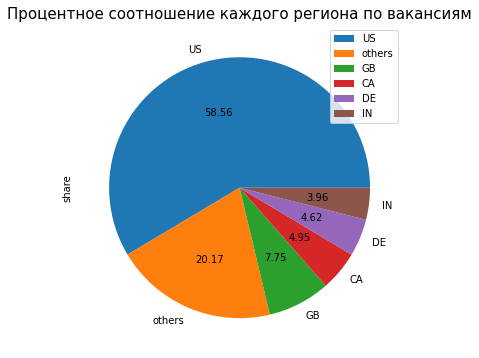

In [14]:
region_share.groupby('company_location').agg('sum').sort_values(by='share', ascending=False).plot.pie(
    y='share', 
    figsize=(10,6),
    autopct= '%.2f'
)

plt.title('Процентное соотношение каждого региона по вакансиям', size=15)
plt.show()

**Вывод**  

Наибольшую долю среди регионов по числу вакансий занимает US (58,6%), остальные регионы представлены гораздо меньшим числом. Для наглядности формирования графика, страны с удельным весом менее 3% сгруппированы в 'others' (всего 45 стран). 

#### Задание 6
Какая корреляция уровня опыта от зарплаты?

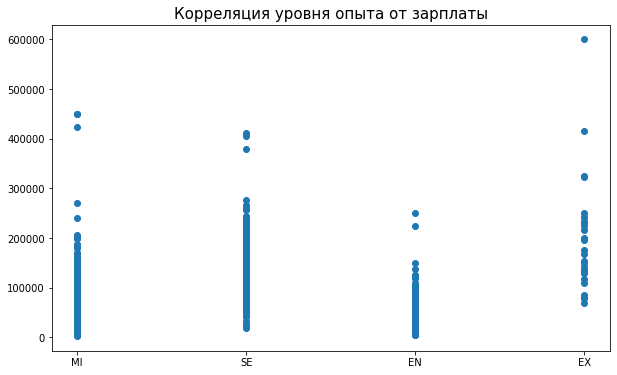

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data = df, y= 'salary_in_usd', x= 'experience_level')
plt.title('Корреляция уровня опыта от зарплаты', size=15)
plt.show()

In [16]:
df.groupby('experience_level').agg({'salary_in_usd':['min', 'max','median']}).round(2).sort_values(by=('salary_in_usd','median'), ascending=False)

salary_in_usd                  
                           min     max    median
experience_level                                
EX                       69741  600000  171437.5
SE                       18907  412000  135500.0
MI                        2859  450000   76940.0
EN                        4000  250000   56500.0

**Вывод**  
Наиболее высокая зарплата у сотрудников с опытом SE(Senior-level), самая низкая у новичков EN(Entry-level).  
Группа руководители (Expert EX) значительно отличаются минимальным порогом заработной платы.

#### Задание 7
Сколько должностей в наборе данных?

In [17]:
df['job_title'].nunique()

50

**Вывод**  

Всего в DF 50 уникальных должностей

#### Задание 8
Какие 10 наиболее часто встречающихся должностей?

In [18]:
df['job_title'].value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
AI Scientist                    7
Name: job_title, dtype: int64

**Вывод**  

Абсолютное большинство встречаемости у должностей Data Scientist (143), Data Engineer(132) и Data Analyst (97), остальные представлены в гораздо меньшем количестве.